In [1]:
from selenium import webdriver
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

In [3]:
mars_table = pd.read_html(url)

In [4]:
mars_table

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [5]:
mars_df = pd.DataFrame(mars_table[0])
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [7]:
mars_df["terrestrial_date"]= pd.to_datetime(mars_df["terrestrial_date"])

In [8]:
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [9]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [10]:
#How many months exist on Mars? 12
maxmonth = mars_df['month'].max()
print("Months on Mars : "+ str(maxmonth))

Months on Mars : 12


In [11]:
min_sol= mars_df['sol'].min()
print(min_sol)

10


In [12]:
max_sol = mars_df['sol'].max()
print(max_sol)

1977


In [13]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_days = mars_df.sol.unique().size
print("Number of Mars days in the scraped data : "+ str(mars_days))

Number of Mars days in the scraped data : 1867


In [14]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
#Get the answer by averaging the minimum daily temperature of all the months. 
#Plot the results as a bar chart.

mars_df2 = mars_df[['month', 'min_temp']].copy()
print(mars_df2)

      month  min_temp
0         6     -75.0
1         6     -76.0
2         6     -76.0
3         6     -74.0
4         6     -74.0
...     ...       ...
1862      5     -78.0
1863      5     -77.0
1864      5     -76.0
1865      5     -77.0
1866      5     -77.0

[1867 rows x 2 columns]


In [15]:
mars_df3 = mars_df2.groupby('month', as_index=False) ['min_temp'].mean().rename (columns=
        {'month':'Mars_Month', 'min_temp':'Avg_Min_Temp'})
print(mars_df3)

    Mars_Month  Avg_Min_Temp
0            1    -77.160920
1            2    -79.932584
2            3    -83.307292
3            4    -82.747423
4            5    -79.308725
5            6    -75.299320
6            7    -72.281690
7            8    -68.382979
8            9    -69.171642
9           10    -71.982143
10          11    -71.985507
11          12    -74.451807


In [16]:
#Coldest Month on Mars is Mars month 3
min_month = mars_df3[mars_df3['Avg_Min_Temp'] < -83]
min_month.head()

,Mars_Month,Avg_Min_Temp
2,3,-83.307292


In [17]:
mars_df3

,Mars_Month,Avg_Min_Temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


In [18]:
#Warmest Month on Mars is Mars month 8
max_month = mars_df3[mars_df3['Avg_Min_Temp'] > -69]
print(max_month)

   Mars_Month  Avg_Min_Temp
7           8    -68.382979


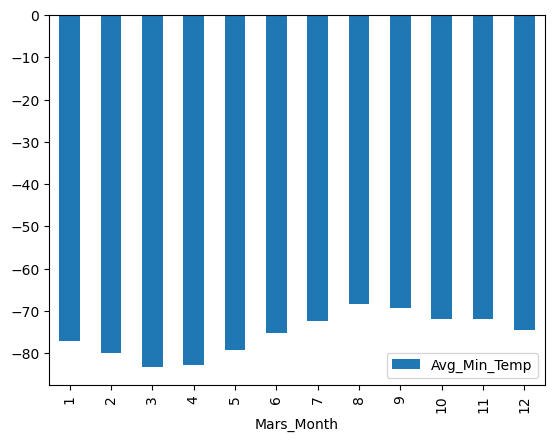

In [19]:
#Plot the results as a bar chart.
ax = mars_df3.plot.bar(x='Mars_Month', y='Avg_Min_Temp')

In [20]:
#Which months have the lowest and the highest atmospheric pressure on Mars? 
#Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

In [21]:
mars_df4 = mars_df[['month', 'pressure']].copy()
print(mars_df4)

      month  pressure
0         6     739.0
1         6     740.0
2         6     741.0
3         6     732.0
4         6     740.0
...     ...       ...
1862      5     730.0
1863      5     729.0
1864      5     729.0
1865      5     728.0
1866      5     727.0

[1867 rows x 2 columns]


In [22]:
mars_df5 = mars_df4.groupby('month', as_index=False) ['pressure'].mean().rename (columns=
        {'month':'Mars_Month', 'pressure':'Avg_Pressure'})
print(mars_df5)

    Mars_Month  Avg_Pressure
0            1    862.488506
1            2    889.455056
2            3    877.322917
3            4    806.329897
4            5    748.557047
5            6    745.054422
6            7    795.105634
7            8    873.829787
8            9    913.305970
9           10    887.312500
10          11    857.014493
11          12    842.156627


In [23]:
mars_df5.describe()

,Mars_Month,Avg_Pressure
count,12.000000,12.000000
mean,6.500000,841.494405
std,3.605551,55.509401
min,1.000000,745.054422
25%,3.750000,803.523831
50%,6.500000,859.751499
75%,9.250000,879.820312
max,12.000000,913.305970


In [24]:
#Mars month with the lowest atmospheric pressure is the 6th Mars Month
min_pressure = mars_df5[mars_df5['Avg_Pressure'] < 746]
print(min_pressure)

   Mars_Month  Avg_Pressure
5           6    745.054422


In [25]:
#Mars month with the highest atmospheric pressure is the 9th Mars Month
max_pressure = mars_df5[mars_df5['Avg_Pressure'] > 913]
print(max_pressure)

   Mars_Month  Avg_Pressure
8           9     913.30597


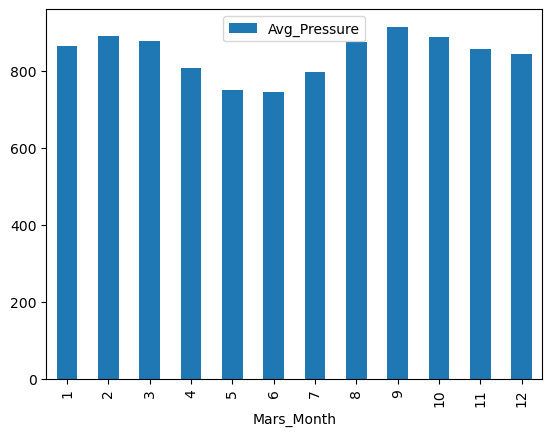

In [26]:
#Plot the results as a bar chart.
ax = mars_df5.plot.bar(x='Mars_Month', y='Avg_Pressure')

In [29]:
#About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#Visually estimate the result by plotting the daily minimum temperature.
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


     terrestrial_date  min_temp
0          2012-08-16         1
1          2012-08-17         1
2          2012-08-18         1
3          2012-08-19         1
4          2012-08-20         1
...               ...       ...
1862       2018-02-23         1
1863       2018-02-24         1
1864       2018-02-25         1
1865       2018-02-26         1
1866       2018-02-27         1

[1867 rows x 2 columns]


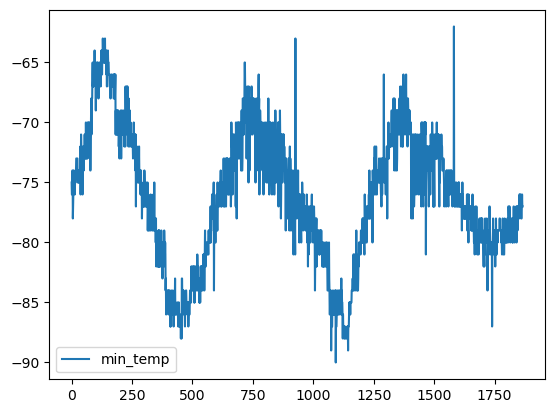

In [41]:
mars_df6 = mars_df.groupby('terrestrial_date', as_index=False) ['min_temp'].count()
print(mars_df6)
ax = mars_df.plot.line(y='min_temp')

In [ ]:
#About how many terrestrial (Earth) days exist in a Martian year? 
#Assuming that the lowest temperature happens each Martian year around the same time.
#The above plot shows the min_temps on the y axis, and x axis is grouped by terrestrial/Earth dates.
#The first dip in the chart is around 450, and the next lowest dip is around 1100. 
##The difference is 650 earth days.

In [ ]:
#Export to dataframe
df.to_csv(filepath) 